In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [13]:
path = "../Data/"

In [14]:
dataset = pd.read_csv(path+'dataset_5secondWindow.csv')
dataset = dataset.drop("Unnamed: 0",axis=1)
dataset = dataset.drop("activityrecognition#0", axis=1)
dataset.head()

,id,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,16170,78.0,100.0,9.811476,9.758895,9.849411,0.014626,0.029340,0.029014,0.029526,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
1,15871,145.0,100.0,9.939207,7.707437,17.146631,1.775944,0.999925,0.999903,0.999946,...,89.200210,89.065143,89.335277,0.191013,16.539349,16.539349,16.539349,0.628595,Car,U12
2,16811,150.0,100.0,9.827178,9.804817,9.849262,0.011199,0.665215,0.665213,0.665218,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,Still,U12
3,15831,105.0,77.0,9.673039,7.659674,12.304298,0.862553,0.996221,0.993781,0.998661,...,87.470377,87.470377,87.470377,2.284186,17.739895,17.739895,17.739895,0.628595,Car,U12
4,876,77.0,100.0,9.993466,8.965621,10.891645,0.504117,0.563792,0.521799,0.672664,...,89.770732,89.770732,89.770732,0.006389,9.000000,9.000000,9.000000,NaN,Car,U1


In [15]:
len(dataset)

5893

In [16]:
label = dataset['target']
le = preprocessing.LabelEncoder()
le.fit(label)
y = le.transform(label)

In [17]:
encode = le.transform(['Bus', 'Car', 'Still', 'Train', 'Walking'])

In [18]:
encode

array([0, 1, 2, 3, 4])

In [19]:
set(dataset['target'])

{'Bus', 'Car', 'Still', 'Train', 'Walking'}

In [20]:
set(y)

{0, 1, 2, 3, 4}

In [21]:
dataset['target']

0         Still
1           Car
2         Still
3           Car
4           Car
         ...   
5888    Walking
5889      Train
5890      Still
5891      Still
5892    Walking
Name: target, Length: 5893, dtype: object

In [22]:
y

array([2, 1, 2, ..., 2, 2, 4])

In [23]:
mean = pd.DataFrame({'acc':dataset['android.sensor.accelerometer#mean'],'linear_acc':dataset['android.sensor.linear_acceleration#mean'],'rotation':dataset['android.sensor.rotation_vector#mean'],'game_rotation':dataset['android.sensor.game_rotation_vector#mean'],'sound':dataset['sound#mean'],'speed':dataset['speed#mean'],'gravity':dataset['android.sensor.gravity#mean'],'light':dataset['android.sensor.light#mean'],'mag_field':dataset['android.sensor.magnetic_field#mean'],'gyr':dataset['android.sensor.gyroscope#mean'],'uncalib_gyr':dataset['android.sensor.gyroscope_uncalibrated#mean'],'orient':dataset['android.sensor.orientation#mean'],'target':y})
mean.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,uncalib_gyr,orient,target
0,9.811476,0.020978,0.050413,0.029340,NaN,0.000000,9.806650,0.0,57.099638,0.001651,0.016221,354.286933,2
1,9.939207,0.879220,0.999981,0.999925,89.200210,16.539349,9.806624,0.0,29.351288,0.036326,0.039023,332.695577,1
2,9.827178,0.034110,0.610456,0.665215,NaN,0.000000,9.806650,2.0,29.904927,0.001525,0.016302,74.752653,2
3,9.673039,1.488361,0.998112,0.996221,87.470377,17.739895,9.806638,0.0,37.836471,0.036440,0.050759,373.556039,1
4,9.993466,1.658308,0.322242,0.563792,89.770732,9.000000,9.806650,30.0,78.375718,0.183202,0.265652,193.201458,1


In [24]:
#std = pd.DataFrame({'acc_std':dataset['android.sensor.accelerometer#std'],'linear_acc_std':dataset['android.sensor.linear_acceleration#std'],'rotation_std':dataset['android.sensor.rotation_vector#std'],'mag_field_std':dataset['android.sensor.magnetic_field#std'],'gyr_std':dataset['android.sensor.gyroscope#std'],'uncalib_gyr_std':dataset['android.sensor.gyroscope_uncalibrated#std'],'orient_std':dataset['android.sensor.orientation#std'],'target_name':dataset['target']})
#std.head()

<IPython.core.display.Javascript object>


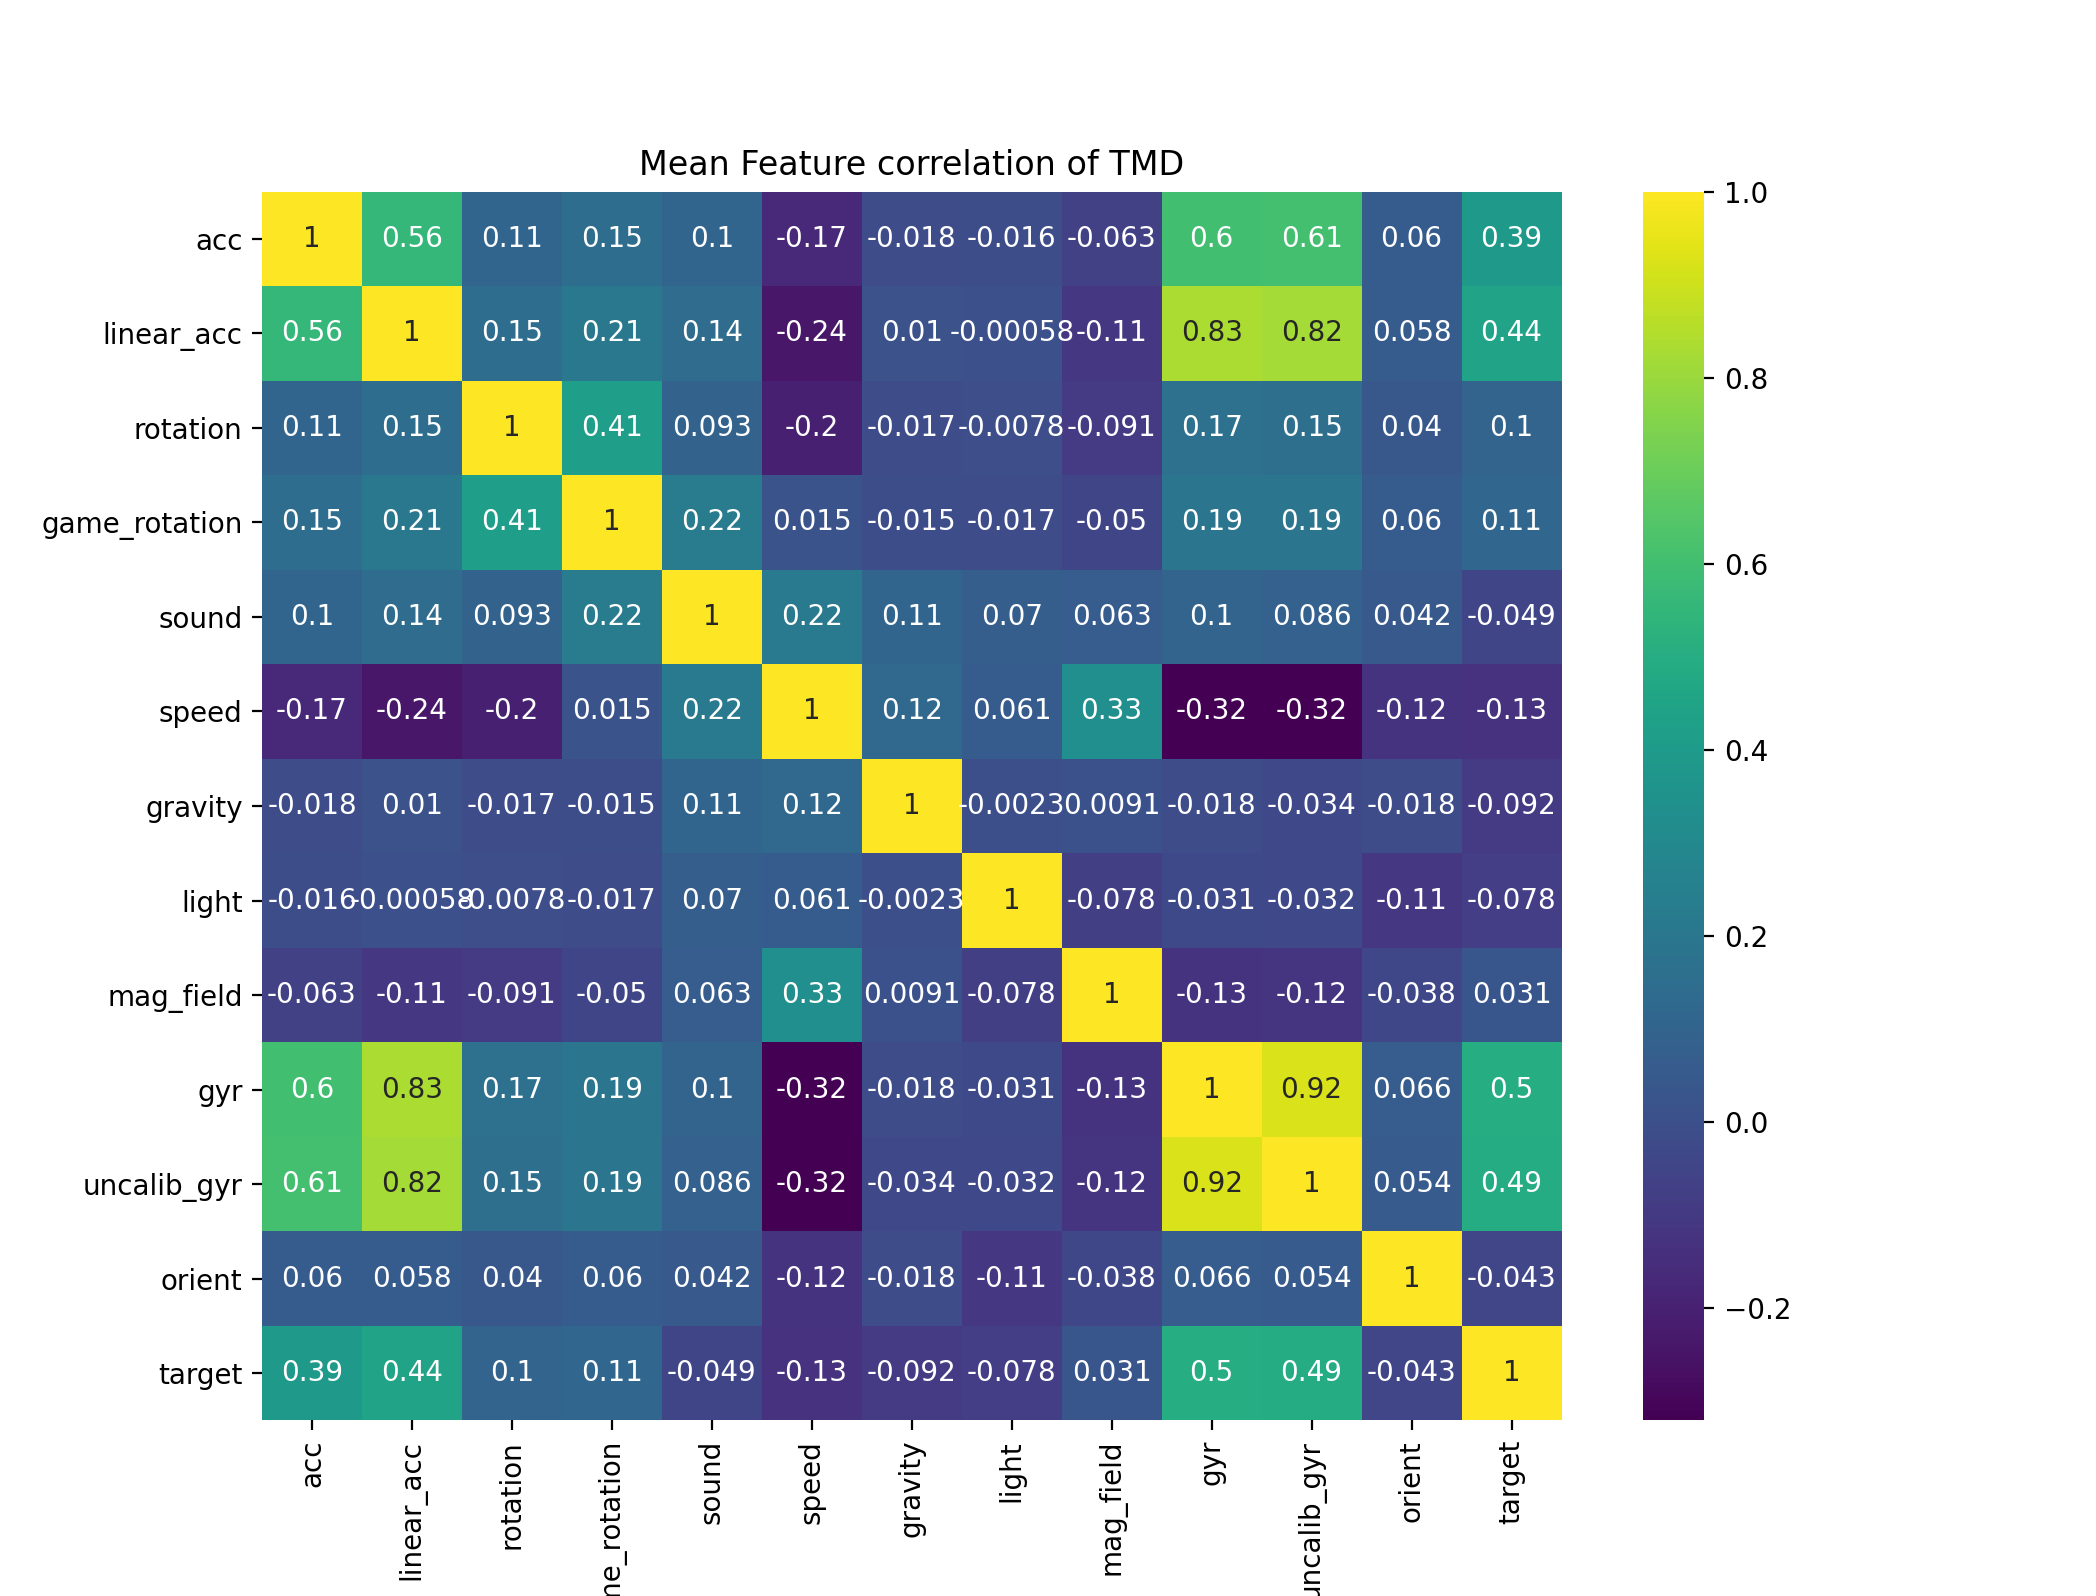

In [25]:
sns.heatmap(mean.corr(),annot=True,cmap='viridis')
plt.title("Mean Feature correlation of TMD")
plt.show()

In [27]:
#final = pd.concat([mean,std], axis=1)
final = mean.drop('uncalib_gyr', axis=1)
final.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
0,9.811476,0.020978,0.050413,0.029340,NaN,0.000000,9.806650,0.0,57.099638,0.001651,354.286933,2
1,9.939207,0.879220,0.999981,0.999925,89.200210,16.539349,9.806624,0.0,29.351288,0.036326,332.695577,1
2,9.827178,0.034110,0.610456,0.665215,NaN,0.000000,9.806650,2.0,29.904927,0.001525,74.752653,2
3,9.673039,1.488361,0.998112,0.996221,87.470377,17.739895,9.806638,0.0,37.836471,0.036440,373.556039,1
4,9.993466,1.658308,0.322242,0.563792,89.770732,9.000000,9.806650,30.0,78.375718,0.183202,193.201458,1


In [28]:
len(final)

5893

### Taking the avg for NaN rows

In [29]:
final = final.sort_values(by=['target'])

In [30]:
final.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
4898,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
5162,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
3308,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
4263,9.770933,1.341121,0.209953,0.361046,NaN,NaN,9.806649,0.0,45.303640,0.202622,338.585784,0
5168,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


In [31]:
classes = set(final['target'])

In [32]:
classes

{0, 1, 2, 3, 4}

In [33]:
grouped = final.groupby(final.target)
df_0 = grouped.get_group(0)
df_1 = grouped.get_group(1)
df_2 = grouped.get_group(2)
df_3 = grouped.get_group(3)
df_4 = grouped.get_group(4)

In [44]:
print(len(df_0),len(df_1),len(df_2),len(df_3),len(df_4))

1178 1180 1179 1179 1177


In [34]:
df_0.mean()

acc                9.773135
linear_acc         0.864002
rotation           0.831138
game_rotation      0.788941
sound             84.059241
speed              5.368554
gravity            9.806648
light            115.050817
mag_field         42.903062
gyr                0.174466
orient           240.819396
target             0.000000
dtype: float64

In [35]:
df_1.mean()

acc                 9.850996
linear_acc          0.839758
rotation            0.627334
game_rotation       0.723411
sound              80.065526
speed              14.679876
gravity             9.806751
light            1020.717317
mag_field          73.791455
gyr                 0.097083
orient            186.512838
target              1.000000
dtype: float64

In [36]:
df_2.mean()

acc                9.860211
linear_acc         0.119120
rotation           0.713090
game_rotation      0.643392
sound             64.390990
speed              0.180379
gravity            9.806624
light             32.466388
mag_field         45.402107
gyr                0.055766
orient           215.163704
target             2.000000
dtype: float64

In [37]:
df_3.mean()

acc                9.902200
linear_acc         0.297217
rotation           0.777479
game_rotation      0.766184
sound             82.978308
speed             34.722137
gravity            9.806648
light             95.641726
mag_field         77.683636
gyr                0.056632
orient           190.661484
target             3.000000
dtype: float64

In [38]:
df_4.mean()

acc               10.654371
linear_acc         4.237317
rotation           0.865093
game_rotation      0.879512
sound             79.960222
speed              1.120206
gravity            9.806182
light            135.157933
mag_field         44.374957
gyr                1.219593
orient           225.632656
target             4.000000
dtype: float64

In [48]:
for col_name in df_0.keys():
    df_0[col_name].fillna(value=df_0[col_name].mean(), inplace=True)
    print(col_name,df_0[col_name].mean())
    df_1[col_name].fillna(value=df_1[col_name].mean(), inplace=True)
    print(col_name,df_1[col_name].mean())
    df_2[col_name].fillna(value=df_2[col_name].mean(), inplace=True)
    print(col_name,df_2[col_name].mean())
    df_3[col_name].fillna(value=df_3[col_name].mean(), inplace=True)
    print(col_name,df_3[col_name].mean())
    df_4[col_name].fillna(value=df_4[col_name].mean(), inplace=True)
    print(col_name,df_4[col_name].mean())

acc 9.77313479511179
acc 9.850996291863288
acc 9.860210954785853
acc 9.902200327170306
acc 10.654370576768004
linear_acc 0.8640021461561935
linear_acc 0.8397581187922782
linear_acc 0.11911951808336585
linear_acc 0.29721713796253785
linear_acc 4.237316982841086
rotation 0.8311378412969425
rotation 0.6273341438993006
rotation 0.713090325008235
rotation 0.7774789160987906
rotation 0.8650932255498665
game_rotation 0.7889408758688751
game_rotation 0.7234107946328646
game_rotation 0.6433915791021546
game_rotation 0.766183536055082
game_rotation 0.8795115500536944
sound 84.05924118577023
sound 80.06552631405327
sound 64.39099000068998
sound 82.97830782928634
sound 79.96022246596641
speed 5.368553579536653
speed 14.679876452262665
speed 0.1803785331903313
speed 34.722137385333205
speed 1.1202056532480025
gravity 9.806647725563494
gravity 9.806750643490354
gravity 9.80662357509129
gravity 9.806648233528446
gravity 9.806181807270137
light 115.05081662176599
light 1020.7173171606685
light 32.4663

/usr/local/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [49]:
final = pd.concat([df_0,df_1,df_2,df_3,df_4])

In [50]:
len(final)

5893

In [51]:
final.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
4898,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
5162,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
3308,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
4263,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,338.585784,0
5168,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


In [52]:
is_NaN = final.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = final[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [acc, linear_acc, rotation, game_rotation, sound, speed, gravity, light, mag_field, gyr, orient, target]
Index: []


<IPython.core.display.Javascript object>


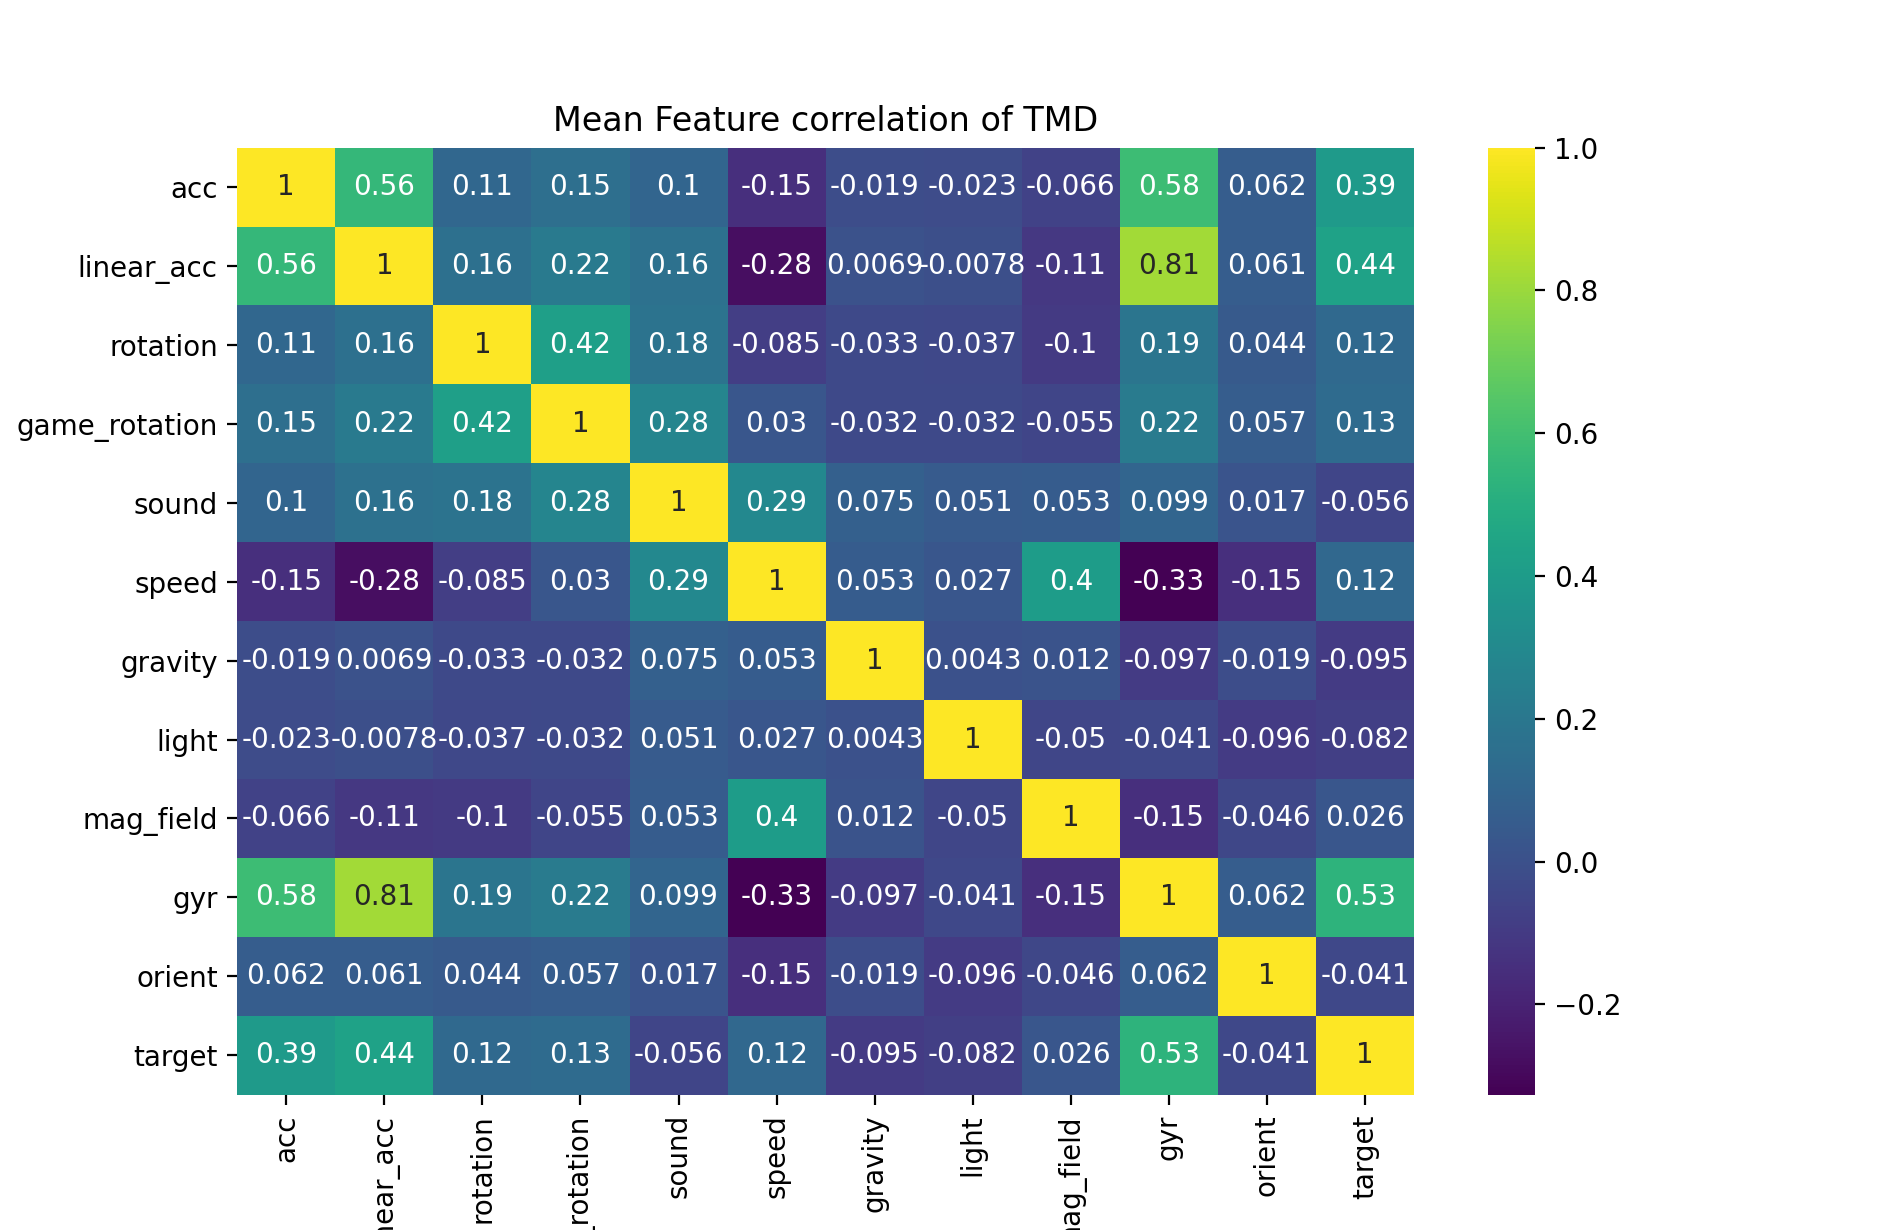

In [53]:
sns.heatmap(final.corr(),annot=True,cmap='viridis')
plt.title("Mean Feature correlation of TMD")
plt.show()

### Checking for the NaN Rows

In [54]:
#Dropping rows with NaN and resetting the index
final = final.dropna()
final.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
4898,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
5162,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
3308,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
4263,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,338.585784,0
5168,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


In [55]:
len(final) # no nan values

5893

In [27]:
#final.to_csv('../Data/final.csv')

In [30]:
final.to_csv('../Data/final_mean.csv')